In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
import time
from IPython import display
import numpy as np
import numpy.linalg as LA
%matplotlib inline

In [2]:
df = pd.read_csv('Assignment5Dataset.csv')
df.head()

,X1,X2
0,0.674362,-0.444625
1,1.547129,-0.239796
2,1.601930,-0.230792
3,0.014563,0.449752
4,1.503476,-0.389164


In [3]:
df.describe()

,X1,X2
count,1500.000000,1500.000000
mean,0.498501,0.251743
std,0.868054,0.496365
min,-1.112339,-0.628397
25%,-0.036013,-0.202562
50%,0.497101,0.246369
75%,1.037322,0.718451
max,2.095098,1.119580


In [4]:
X = df.to_numpy()
(n,d) = X.shape

In [5]:
X

array([[ 0.67436247, -0.44462513],
       [ 1.54712926, -0.23979589],
       [ 1.60192965, -0.23079209],
       ...,
       [-0.76189341,  0.58166603],
       [ 1.80385814, -0.15470511],
       [ 0.203305  ,  0.07904928]])

In [6]:
def visualize_clusters(X,C):
    df = pd.DataFrame(X,columns = ['X1','X2'])
    df['Cluster'] = C
    sns.relplot(data = df,x = "X1",y = "X2",hue = 'Cluster')
    
def spectral_clustering(X,eps):
    (n,d) = X.shape
    L = np.zeros(shape = (n,n))
    # L = D-W

    def norm(x):
        return x@np.transpose(x)

    for i in range(n):
        for j in range(n):
            if i!=j and norm(X[i]-X[j]) < eps**2:
                L[i][j] = -1      # Corresponds to W
                L[i][i] = L[i][i]+1  # Corresponds to D
    eigenValues, eigenVectors = LA.eig(L)

    idx = eigenValues.argsort() # eigenValues in increasing order
    eigenValues = eigenValues[idx]
    eigenVectors = eigenVectors[:,idx]
    i = 0
    while i<n and eigenValues[i]<=1e-10:  # Get the smallest non-zero eigen value
        i = i+1
    eig_2 = eigenVectors[:,i]
    C = (eig_2 >=0).astype(int)
    
    
    cost = 0   # cost of the cut
    for i in range(n):
        if C[i]==1:
            continue
        for j in range(n):
            if C[j]==1:
                cost = cost-L[i][j] # W[i][j] = -L[i][j]  i!=j
    
    visualize_clusters(X,C)
    
    print("cost == ",cost)
    return (C,L,eigenValues)

def visualize_graph(X,L):
    (n,d) = X.shape
    df = pd.DataFrame(X,columns = ['X1','X2'])
    sns.scatterplot(data = df,x = "X1",y = "X2")
    for i in range(n):
        for j in range(n):
            if L[i][j] == -1:
                plt.plot([X[i][0],X[j][0]], [X[i][1],X[j][1]], linewidth=1)

def dfs(L,i,vis,lst):
    n = L.shape[0]
    lst.append(i)
    vis[i] = 1
    for j in range(n):
        if vis[j]==0 and L[i][j]!=0:
            dfs(L,j,vis,lst)
            
def count_connected_comp(L):
    comp = []
    n = L.shape[0]
    count = 0
    vis = [0 for element in range(n)]
    for i in range(n):
        if vis[i]==0:
            lst = []
            dfs(L,i,vis,lst)
            comp.append(lst)
            count = count+1
    return (count,comp)

cost ==  118653.0


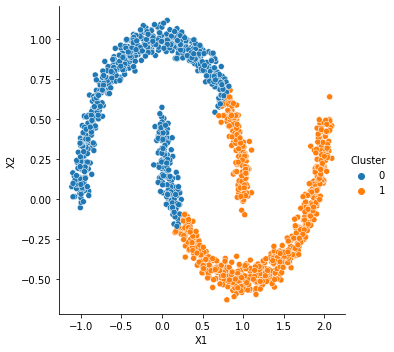

In [7]:
(C,L,e) = spectral_clustering(X,1.2)

In [14]:
e[:10]<=1e-10

array([ True, False, False, False, False, False, False, False, False,
       False])

<b> Multiplicity of eigen value 0 is 1, So one connected componect present in graph</b>

In [109]:
(count,comp) = count_connected_comp(L)
count

1

cost ==  69688.0


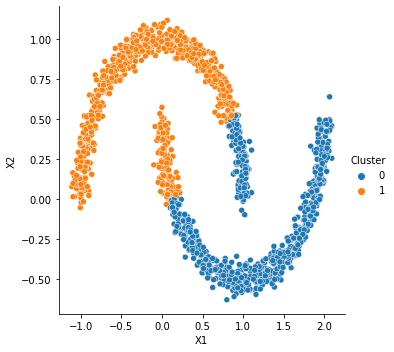

In [110]:
(C,L,e) = spectral_clustering(X,1)

In [111]:
e[:10]<=1e-10

array([ True, False, False, False, False, False, False, False, False,
       False])

<b> Multiplicity of eigen value 0 is 1, So one connected componect present in graph</b>

In [112]:
(count,comp) = count_connected_comp(L)
count

1

cost ==  1444.0


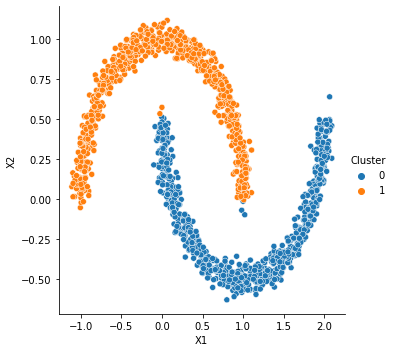

In [57]:
(C,L,e) = spectral_clustering(X,0.5)

In [58]:
e[:10]<=1e-10

array([ True, False, False, False, False, False, False, False, False,
       False])

In [114]:
(count,comp) = count_connected_comp(L)
count

1

cost ==  3.0


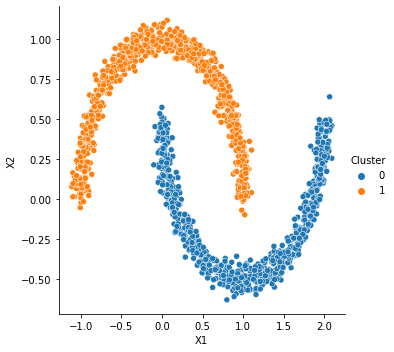

In [60]:
(C,L,e) = spectral_clustering(X,0.3)

In [61]:
e[:10]<=1e-10

array([ True, False, False, False, False, False, False, False, False,
       False])

In [116]:
(count,comp) = count_connected_comp(L)
count

1

In [ ]:
df = pd.DataFrame(X,columns = ['X1','X2'])
df['Cluster'] = C
ax = sns.scatterplot(data = df,x = "X1",y = "X2",hue = 'Cluster')
for i in range(n):
    circle = plt.Circle(xy=X[i], radius=0.07, color='red', fill=False)
    ax.add_patch(circle)

cost ==  1917.0


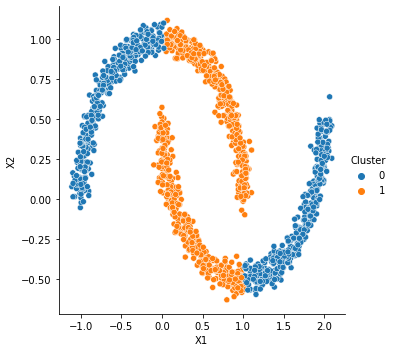

In [117]:
(C,L,e) = spectral_clustering(X,0.2)

In [118]:
e[:7]<=1e-10

array([ True,  True, False, False, False, False, False])

<b> Multiplicity of eigen value 0 is 2, So 2 connected componect present in graph</b>

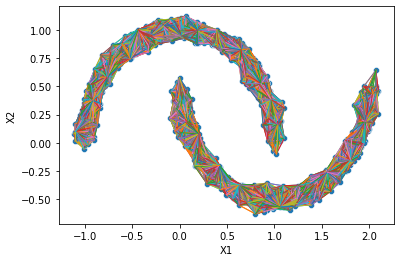

In [83]:
visualize_graph(X,L)

In [119]:
(count,comp) = count_connected_comp(L)
count

2

<font size = 3><b> Why can't we do in this way</b></font>

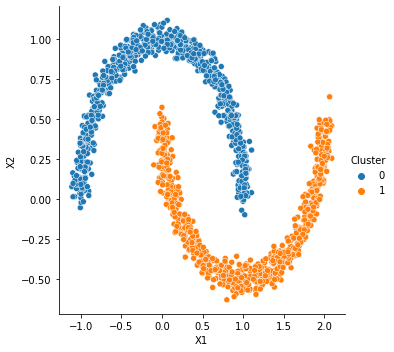

In [121]:
C[comp[0]] = 1
C[comp[1]] = 0
visualize_clusters(X,C)

cost ==  1.0


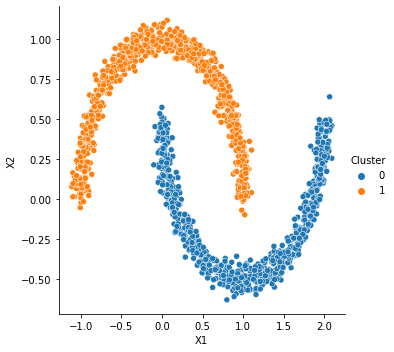

In [122]:
(C,L,e) = spectral_clustering(X,0.29)

In [123]:
e[:10]<=1e-10

array([ True, False, False, False, False, False, False, False, False,
       False])

In [124]:
(count,comp) = count_connected_comp(L)
count

1

<b> Decreasing the eps furthur will increase the connected components</b>